# Correlation Lesson Notes

#### Goal: Determine if two samples have a linear relationship

Pearson's r
- 2 continous variables


$H_0$ - No linear relationship  
$H_a$ - Linear relationship exists

In [18]:
#example 1 - Students' exam scores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import sqrt

from scipy import stats
from pydataset import data

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


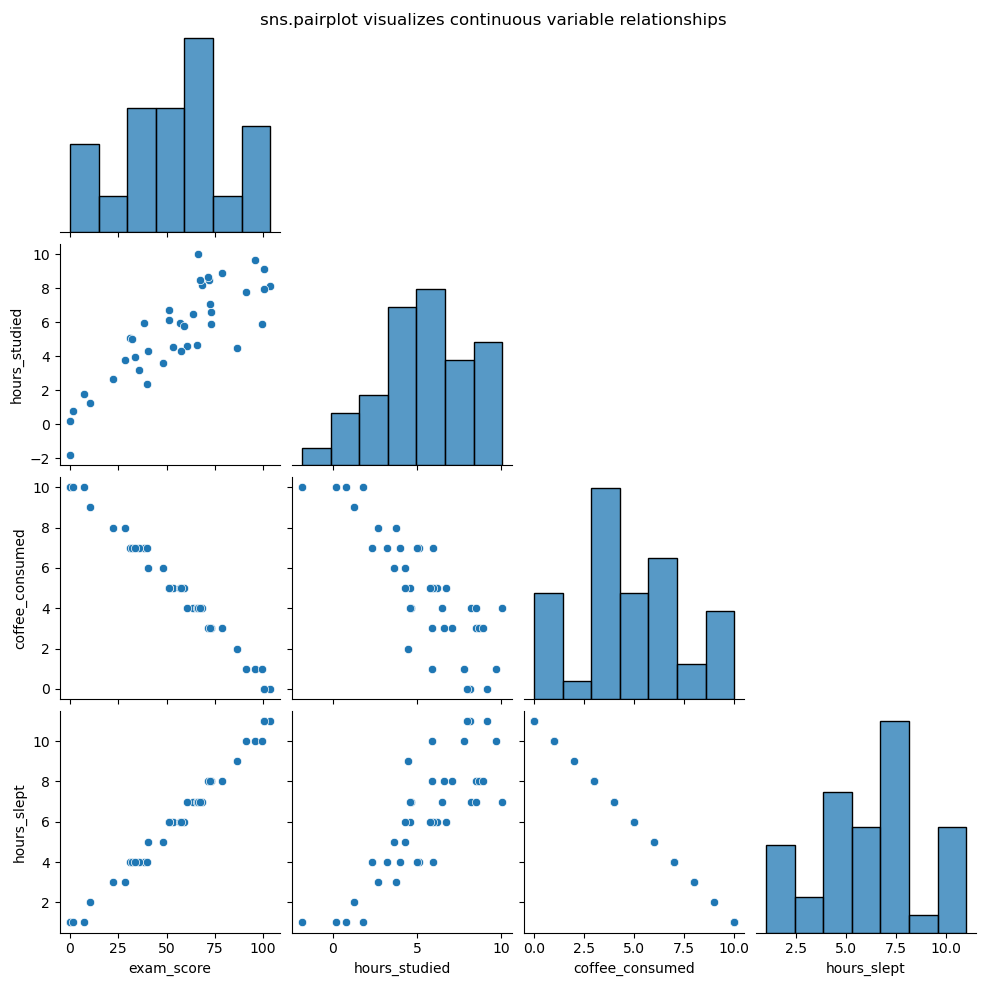

In [4]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [6]:
#preset values

#number of observations
n = df.shape[0]

#degrees of freedom - the # of values in the final calculation of a statistic that are free to vary
degf = n - 2

#desired confidence interval
conf_interval = .95

#alpha = .05
alpha = 1 - conf_interval

In [13]:
df.shape[0]

40

#### Setting up the test for correlation:

- number of hours studied 
- exam score

$H_0$ - No linear relationship between number of hours studied and the exam score  
$H_a$ - There is a linear relationship between number of hours studied and the exam score

In [8]:
# Retrieve the x and y values
x = df.hours_studied
y = df.exam_score

#a function that will find the standard deviation of a set of values by first calculating the variance
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

#apply the results to the formula for Pearson's r
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

# The Pearson's r value is r_xy

0.8351498542413306

In [12]:
# Find a p-value

#the t statistic for exam scores and hours studied
#calculated with (40 - 2) = 38 degrees of freedom
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

9.359998377263368

In [14]:
# Find the p-value based on the t-statistic 

#t-statistic (t)
#degrees of freedom (degf)

#Doubled the p-value for comparision
p = stats.t.sf(t, df=degf) * 2 #*2 for a two tailed test
p

2.0762953315463266e-11

In [15]:
# Compare alpha to p-value

p < alpha

True

#### Conclusion 

Reject the null hypothesis  
Reject that there is no linear relationship  
Reject that there is no correlation

<AxesSubplot:xlabel='hours_studied', ylabel='exam_score'>

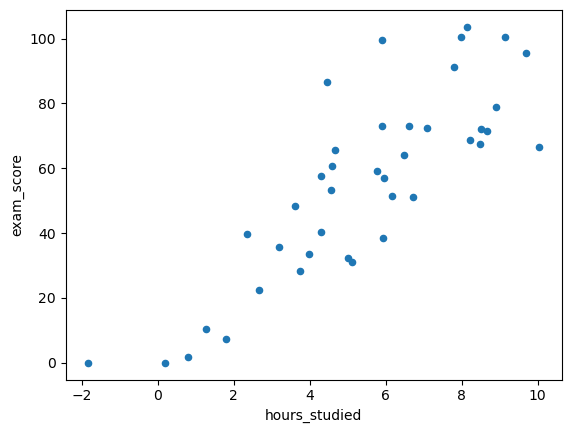

In [19]:
# A visualization of exam scores and hours studied

df.plot.scatter(y='exam_score', x='hours_studied')

# Using SciPy ```stats``` module

####  *Unrelated* 
##### Example of how to write python in markdown
```python
def my_func()
```


In [20]:
#stats submodule of scipy

#pearsonr
#defining x variable
#defining y variable

#returns:
#correlation [-1 and 1]
#P value
#stats.pearsonr(x, y)

corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542413308, 2.0762953315462826e-11)

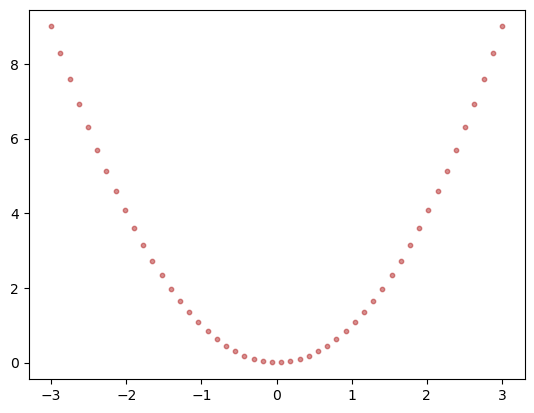

In [22]:
# Non Linear Relationship 

x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=0.5)

In [24]:
r, p = stats.pearsonr(x, y)
print(f'The Pearson correlation coefficient = {r:.5f}')
print(f'The associated p-value = {p:.1f}')

The Pearson correlation coefficient = -0.00000
The associated p-value = 1.0


Text(8, 80, 'r = -0.994')

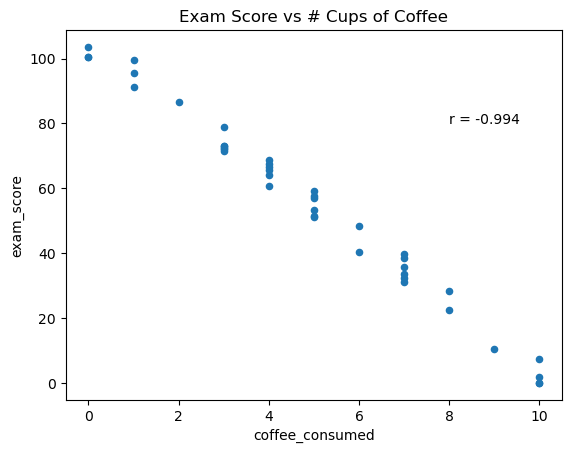

In [25]:
# Coffee consumed and exam score

# Pearson's r and p-value
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

#scatter plot
df.plot.scatter('coffee_consumed', 'exam_score')

#Format is 'y variable vs x variable'
plt.title('Exam Score vs # Cups of Coffee')

#display the pearson's r coefficient on the graph
plt.text(8, 80, f'r = {r:.3f}')

In [26]:
#Pearson's r and p-value for the relationship between hours slept and coffeee consumed
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)

#Pearson's r and p-value for the relationship between hours slept and exam score
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')

#hours slept and the exam score

#hours slept and coffee consumed

Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


Text(1, 63, 'p = 0.000000e+00')

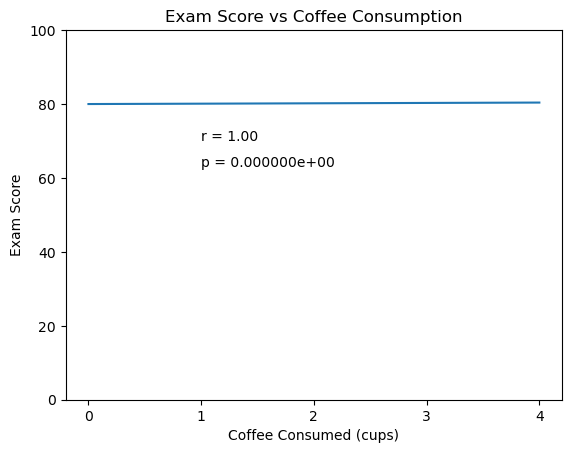

In [27]:
# Example -Scale of a linear relationship

#Assign data values
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

#calculate Pearson's r and p-value
r, p = stats.pearsonr(cups_of_coffee, exam_score)

#Plot Exam Score vs Coffee Consumed 
plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')


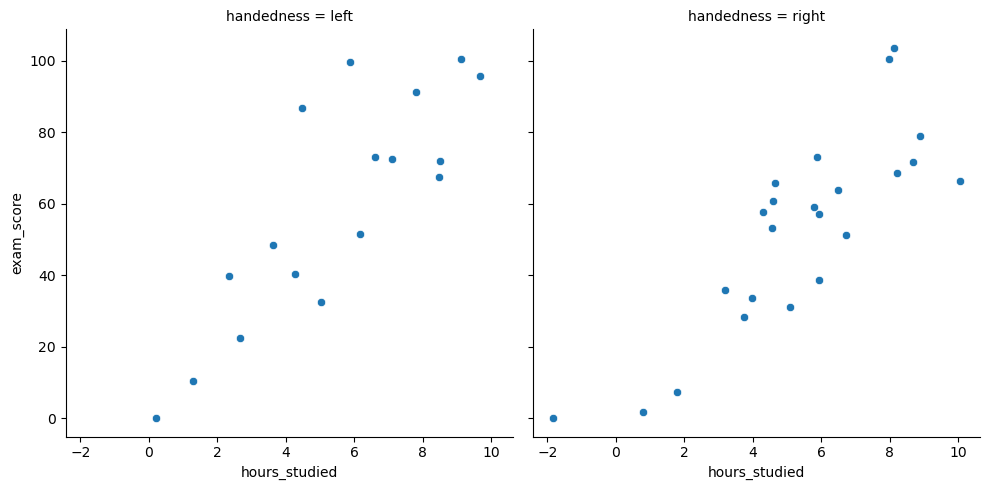

In [29]:
# Controlling for a variable

sns.relplot(data=df, y='exam_score', x='hours_studied', col='handedness')

In [30]:
#Filter by left and right handedness
#lefties 

lefties = df[df.handedness == 'left']
righties = df[df.handedness == 'right']

In [32]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print('Lefties')
print(' r =', r)
print(' p =', p)

Lefties
 r = 0.8389846518512478
 p = 2.561723682481375e-05


In [33]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print('Righties')
print(' r =', r)
print(' p =', p)

Righties
 r = 0.8407115600383273
 p = 5.114047317102283e-07
